<a href="https://colab.research.google.com/github/gcorani/bda/blob/main/nbooks/2_ProbProgramming_normal_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pymc as pm
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from scipy.stats import t
from scipy.stats import norm
import seaborn as sns
from IPython.display import display, Markdown
az.style.use('arviz-darkgrid')
np.random.seed(44)


In [2]:
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams.update({
    'figure.figsize': [7,3],
    'figure.constrained_layout.use': True,
    'font.size': 14.0,
    'hist.bins': 'auto',
    'lines.linewidth': 3.0,
    'lines.markeredgewidth': 2.0,
    'lines.markerfacecolor': 'none',
    'lines.markersize': 8.0,
})
sns.set(rc={'figure.figsize':(7,3)})

# Normal-normal models  in probabilistic programming


Giorgio Corani <br/>
*Bayesian Data Analysis and Probabilistic Programming*
<br/>
<br/>
``giorgio.corani@supsi.ch``





# Based on..


*   Chapter 2 of O. Martin, *Bayesian Analysis with Python, Second Edition*.

*  Notebook by G. Corani

# Normal - normal model


\begin{align*}
\mu & \sim N(\mu', \sigma_{\mu})  && \text{prior uncertainty on } \mu\\
\sigma & \sim \text{HalfNormal} (\xi) &&  \text{prior uncertainty on } \sigma\\
\vec{y} & \sim N(\mu, \sigma) && \text{distribution of the data given } \mu \text{ and } \sigma \\
\end{align*}

* The observations $\vec{y}=\{y_1,y_2,y_n\}$ are assumed to be independent.


# Inference about the speed of light

* At the end of the 19th century  Newcomb carried out several experiments to determine the speed of light.

* He measured 66 times how much time it took for the light to travel a certain distance.

* The reported data are the time in millionths of a second for light to traverse a known distance.

* Based on  theory,  he expected the travel time to be within (246,  250).
We formalize this with the prior $\mu \sim N(248,1)$.

* He estimates his measuring tools to yield to have a precision of +- 0.2.
We formalize this by choosing the scale of the NH so that the median is about 0.2.
     

In [4]:
#Below  the  66 measurements.

data = np.array([248.28, 248.26, 248.33, 248.24, 248.34, 247.56, 248.27, 248.16,
                  248.4, 247.98, 248.29, 248.22, 248.24, 248.21, 248.25, 248.3,
                  248.23, 248.29, 248.31, 248.19, 248.24, 248.2, 248.36, 248.32,
                  248.36, 248.28, 248.25, 248.21, 248.28, 248.29, 248.37, 248.25,
                  248.28, 248.26, 248.3, 248.32, 248.36, 248.26, 248.3, 248.22,
                  248.36, 248.23, 248.27, 248.27, 248.28, 248.27, 248.31, 248.27,
                  248.26, 248.33, 248.26, 248.32, 248.32, 248.24, 248.39, 248.28,
                  248.24, 248.25, 248.32, 248.25, 248.29, 248.27, 248.28, 248.29,
                  248.16, 248.23])

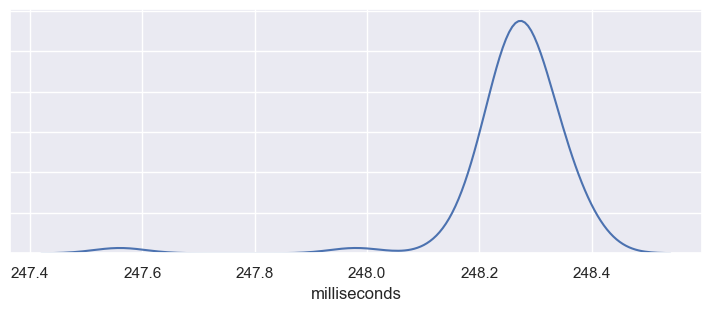

In [5]:
# The data are almost  normally distributed, apart from some  low-values outliers  which are far from the mean.
#the density plot is called kde (kernel density estimation)
sns.kdeplot(data)
plt.gca().set_yticklabels([])
plt.xlabel('milliseconds')
plt.ylabel('');

In [6]:
#tune the halfnormal prior to have a median close to 0.2, the plausible value of sigma a priori.
from scipy.stats import halfnorm

#scale of the half-normal obtained after some trial and error
halfnorm.median(scale=0.3) #0.2

np.float64(0.2023469250588245)

In [7]:
with pm.Model() as normal_model:
    # The prior information from the theory is represented by a N(248, 1).
    mu = pm.Normal('mu', 248, 1)

    # By using a  scale parameter of 3, the median  of the halfnormal is close to 2.,
    sigma = pm.HalfNormal('sigma', 0.3)


    #likelihood. The observation are stored in vector 'data'.
    #and assumed to be independent.
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)

    normal_trace = pm.sample()

Initializing NUTS using jitter+adapt_diag...
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(248)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_4b1g9o23

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_5xevhkp_

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_eiw9dhmw

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_avvqc8t1


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(248)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/py


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_2ls5ehju

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_jjpxgzxs

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_rz7pd2nm

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_sh6r5q8b


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Log(0.3)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/s


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_l4lllf4w

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_ynzl6guw

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_5w_4fk8c

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_fhfohb_n


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float32}(1)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/pyth


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_0hggw5a_

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_7h6q0rqd

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_uss1_fhy

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_0dw0m4tj


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Log(0.3)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/s


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_s9r_garr

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_nk8sok2p

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_q8tly5ec

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_0u1q58ni


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float32}(1)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/pyth


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_ftmux8vd

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_0to9zh0v

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_wa21eep5

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_6h9ubsah


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Log(0.3)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/s


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_p9uzxcm3

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_d8d6ukyl

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_jp0uelw9

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_q11kia4s


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float32}(1)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/pyth


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_ht3x9s_d

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_t_uj828b

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_9xpfa8bn

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_jq1ju4wi


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Log(0.3)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/s


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_8vnsvf5c

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_emij6_0s

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_qg1nril0

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_0_gmzdmw


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float32}(1)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/pyth


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_d013i74q

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_tpiu9x7k

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_li1eagxx


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Log(0.3)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/s


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_eddk4h7i

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_fjdvdq_i

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_7uv81vxv

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_kdbwhiwd


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(1)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/pyth


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_xtiiiq0v

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_5v454pxs

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_vlmr04gg

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_chjqnng8


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(-0.5)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/p


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_77ii70dz

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_xkoitwge

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_kkj7qpfp

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_znkwn2ws


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Log(0.3)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/s


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_mni6a1yp

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_7byq5yd0

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_7y4kh0s4

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_1xdttezz


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(1)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/pyth


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_9_7eqj3x

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_0ifq_gfw

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_n86ek3eo

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_8f4gperp


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(-0.5)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/p


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_n2g28g6p

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_qkuchhnu

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_mjtqm873

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_5syfpv0v


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Log(0.3)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/s


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_7b_wxv0z

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_c1o1ui9h

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_cuagx06z

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_91k725bp


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(1)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/pyth


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_vdwlw8ke

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_1rjx3psh

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_u16tpx3j

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_z_z0nrmh


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Sqrt(0.6366197723675814)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_tdng_o5p

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_jeggsobx

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_bjcqph4p

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_u_1_efed


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Sum{axes=None}([-1. -1. - ... . -1. -1.])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/min


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_4jomcy4u

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_6z3_kfbu

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_gucwtie9

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_fhe5tfqp


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(-0.5)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/p


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_nsra6m65

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_rq_axm_7

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_bkmobyyw

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_ln66zm4v


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Sqrt(6.283185307179586)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/l


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_5_7dn_oe

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_2c39aje9

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_npip7t3z

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_bz0lufiz


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float32}(1)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/pyth


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_6wepcfze

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_52kg1k4r

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_uixi9vt0

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_q6hdv9ql


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Log(0.3)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/s


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_p96zjdlb

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_p8cg_16b

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_ohs897y2

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_1tg1_o95


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(1)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/pyth


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_ytyw9edr

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_k5y_vyy7

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_h6wfs1y6

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_8rhnp523


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Sqrt(0.6366197723675814)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_ed3o8twt

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_27m4x0j7

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_j187cqm5

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_si230pj_


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Sum{axes=None}([-1. -1. - ... . -1. -1.])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/min


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_p_rex_zf

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_duulthft

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_2c5dct1j

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_y8jfifcm


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(-0.5)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/p


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_80er4q3y

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_evjafu2w

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_btlfhf38

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_57agbh2w


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Sqrt(6.283185307179586)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/l


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_5bi8mcx7

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_uco0d0_v

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_sncrz7ve

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_zhrdr18j


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float32}(1)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/pyth


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_fyakoawz

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_mj01q88y

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_t67il_6k

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_eqvzh8a2


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Log(0.3)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/s


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_vwxtd4jr

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_zz1mehoq

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_g7_ml29q

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_u5mv83rr


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(1)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1160, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/bda/lib/pyth


You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_ahnb4a1y

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_h32sh_bv

You can find the C code in this temporary file: /var/folders/tr/48q31n41473glpbhlkdzc1qh0000gp/T/pytensor_compilation_error_l9sbniy8


CompileError: Compilation failed (return status=1):
/usr/bin/clang++ -dynamiclib -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -Wno-c++11-narrowing -fno-exceptions -fno-unwind-tables -fno-asynchronous-unwind-tables -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -fPIC -undefined dynamic_lookup -ld64 -I/opt/miniconda3/envs/bda/lib/python3.12/site-packages/numpy/_core/include -I/opt/miniconda3/envs/bda/include/python3.12 -I/opt/miniconda3/envs/bda/lib/python3.12/site-packages/pytensor/link/c/c_code -L/opt/miniconda3/envs/bda/lib -fvisibility=hidden -o /Users/giorgiocorani/.pytensor/compiledir_macOS-15.6.1-arm64-arm-64bit-arm-3.12.12-64/tmpe3v6ouz1/mb91daa555a95c9b4b0f401e31bf57d2806fe3f54003386257fcba4e6eb522ff8.so /Users/giorgiocorani/.pytensor/compiledir_macOS-15.6.1-arm64-arm-64bit-arm-3.12.12-64/tmpe3v6ouz1/mod.cpp
/Users/giorgiocorani/.pytensor/compiledir_macOS-15.6.1-arm64-arm-64bit-arm-3.12.12-64/tmpe3v6ouz1/mod.cpp:7:10: fatal error: 'vector' file not found
    7 | #include <vector>
      |          ^~~~~~~~
1 error generated.

Apply node that caused the error: Sum{axes=None}([-1. -1. - ... . -1. -1.])
Toposort index: 3
Inputs types: [TensorType(float64, shape=(66,))]

HINT: Use a linker other than the C linker to print the inputs' shapes and strides.
HINT: Re-running with most PyTensor optimizations disabled could provide a back-trace showing when this node was created. This can be done by setting the PyTensor flag 'optimizer=fast_compile'. If that does not work, PyTensor optimizations can be disabled with 'optimizer=None'.
HINT: Use the PyTensor flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.

In [ ]:
# The  density plots of  both parameters are smooth and the chains are well-mixing.

with  normal_model:
    az.plot_trace(normal_trace)

In [ ]:
# The  density plots of  both parameters are smooth and the chains are well-mixing.
az.summary(normal_trace)

# Prior sensitivity

* We now test with a different prior, assuming the travel time to be within (200, 300). Recall that before we had instead a more informative prior, referring to the interval (246,  250).

* We refer to this as a *weak* prior.

* The prior on sigma is not changed.


In [ ]:
with pm.Model() as model_weak_prior:

    mu = pm.Normal('mu', 250, 25)

    #identical to the previous model
    sigma = pm.HalfNormal('sigma', 0.3)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)

    trace_weak_prior = pm.sample(return_inferencedata=True)

In [ ]:
# The posterior is practically identical under the two different priors.
# This is  good: the data are strong enough to converge to the same posterior.
# The likelihood overwhelms the prior; the results are thus robust to the specification of the prior.
pd.concat( [az.summary(normal_trace), az.summary(trace_weak_prior)] )

# Predictions

# Point prediction

* How to make a prediction about the next measurement $y^{\text{new}}$?


* The simplest answer is to use the posterior mean (248.262, see previous slide). Recall that the posterior mean is compromise between the prior mean and the sample mean. However this is a **point prediction** without quantification of the uncertainty.


#  Predictive distribution

To model the uncertainty, we compute a distribution (*predictive distribution*) for the next observation. We denote the next observation by $y^{\text{new}}$.

The predictive distribution accounts for

*  the *epistemic* uncertainty about $\mu$ and  $\sigma$, i.e., the fact that we are unsure about the actual value of them;

* the *aleatory* uncertainty, i.e., the randomness of sampling from a normal distribution, even if  know exactly $\mu$ and $\sigma$.

# Computing the predictive distribution

* The trace contains e.g. 4000  samples, i.e., 4000 values of $\mu$ and $\sigma$ from the posterior.

* We denote the $s$-th  sample  $<\mu_s, \sigma_s >$ (a sample contains a value for each parameter)


# Computing the predictive distribution

* We compute a  prediction from  each  sample:

$$
\left[
\begin{array}{ll}
\mu_1 &   \sigma_1 \\
\mu_2 & \sigma_2 \\
\vdots & \vdots  \\
\mu_{4000}  & \sigma_{4000} \\
\end{array}
\right]
\;\; \longrightarrow \;\;
\left[
\begin{array}{l}
y^{\text{new}}_{1} \\
y^{\text{new}}_{2} \\
\vdots \\
y^{\text{new}}_{4000} \\
\end{array}
\right]
$$

with:

$$y^{\text{new}}_{s} \; \sim \; N\left(\mu_s, \sigma_s\right)$$


* The  4,000 drawn values of $y_{\text{new}}$ are the *predictive* distribution of a new measurement.

# Computing the predictive distribution

In [ ]:
#extract the posterior samples of mu and sigma
post_samples = az.extract(normal_trace.posterior)
mu_post      = post_samples.mu.values
sigma_post   = post_samples.sigma.values

# we draw five values for each pair of mu and sigma values.
# This provides  a smoother predictive distribution.
s = 5 #number of y_new sampled  for each element of the trace.
y_new = np.zeros( len(mu_post) * s)

#we should use together  the values of sigma e mu referring to the same sample
for i in range(len(mu_post)):
        y_new[i*s : (i+1) * s] = np.random.normal (loc = mu_post[i], scale = sigma_post[i], size=s)


In [ ]:
# plot and summarize the predictive distribution
sns.kdeplot(y_new)

# since the distribution is symmetric, the 95% HDI is obtained by taking the 2.5 and 97.5 quantile
hdi = [np.quantile(y_new, 0.025), np.quantile(y_new, 0.975)]
pred_mean = np.mean(y_new)
print("mean: " + str(round(pred_mean,3)))
print("95% hdi: [" + str(round(hdi[0],3)) + " , " + str(round(hdi[1],3)) + " ]")

In [ ]:
# posterior samples are stored as xarray, which is library  of multidimensional arrays with labelling.
post_samples

In [ ]:
# We now compute the posterior predictive from pymc.

with pm.Model() as normal_model_with_pred:
    #model as before
    mu = pm.Normal('mu', 240, 80)
    sigma = pm.HalfNormal('sigma', 3)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)

    #prediction of a new value
    # for every sample of mu and sigma generates a value of y_new, sampling from a Normal.
    y_new = pm.Normal('y_new', mu=mu, sigma=sigma)

    trace_normal_with_pred = pm.sample(return_inferencedata=True)

In [ ]:
# using 'var_names'  we can select the variables shown in the summary
# The mean and the extremes of the HDI are very close to what we computed before in the for loop.
# Small differences are due to the randomness of the sampling.
# The sampling error for the mean parameter is estimated by mcse_mean (standard error of the mean).
# Different repetition of the sampling will overall span a region of about +-3 mcse_mean around the actual value.
# We can expect different repetitions to possibily lie within a range of 6 mcse_mean.
# Even 6 mcse_mean are a few orders of magnited lower than the estimated mean, hence our estimate is solid.
az.summary(trace_normal_with_pred, var_names='y_new', hdi_prob=0.95)

# Your turn: predictive distribution for a beta-binomial model.


* Consider the prior $\theta \sim Beta(5,5)$
* Observations: 10 successes in 15 trials

* Which is the posterior distribution of $\theta$? (use the standard beta-binomial model)

* Compute the predictive distribution for the number of successes on the future 20 trials.

* Analyze the mean and the 95% HDI and draw your conclusions.

* Solution at the end of the notebook.


# Posterior predictive checks


*  Even if the sampling has converged correctly, the model might be inadequate.

* To check the model fit we generate virtual datasets from the parameters posterior and compare them to the actual data.

* Note that Bayesian models are able to generate artificial data.

# Posterior predictive checks


*  The original data set contains $n$=66 observations.

*  For each sample $\mu_s, \sigma_s$  of the trace we generate a data sets of size $n$=66.

*  We then visually check the distribution of each simulated data set vs the distribution of the observations.

# Posterior predictive checks

* The  `sample_posterior_predictive` automates the whole procedure.

* The returned ppc object contains 4000 data sets of size 66 (same size of the actual data set).



In [ ]:
with normal_model:
    # The returned ppc variable is a dictionary.
    # It contains  a data set as large as the original one (66) for each parameter sample <mu,sigma> in the trace
    ppc = pm.sample_posterior_predictive(normal_trace, model=normal_model)

In [ ]:
ppc

In [ ]:
# plot_ppc shows the overlay of density estimates of the actual data set (solid) and the simulated data sets.
# The average of the simulated densities is also shown.
# The simulated datasets have too low densities in the center.
# The variance of the normal normal model is too large, and the model provides a poor fit.
# The variance is inflated by outliers. Indeed, the normal model and the normal distribution
# in general is not robust when dealing with outliers.
az.plot_ppc(ppc);

#  Robust models

* Outliers are observations which are  far from the mean  and isolated from the other ones.

* These points could be due to experimental errors. While we could remove them from the data, this is unavoidably arbitrary; we cannot validate the criterion used to detect outliers.

* A more rigorous approach is to adopt a *heavy-tailed* (or *long-tailed*) likelihood which allows some probability also to observations which are far from the mean (i.e., beyond the range $\mu \pm 3 \sigma$). This is a  *robust* model.

* The $t$ distribution is a robust alternative to the normal distribution.


#  The normal distribution has light tails

* The normal distribution is  sensitive to outliers, since
the density  is practically 0 outside  $\mu \pm 3 \sigma$.


* If the data set contains observations very far from the mean, the normal model  inflates the variance to include them within the $\mu \pm 3 \sigma$ interval.

# Student's t distribution


* It is characterized by  mean $\mu$,   scale $\sigma$  and  *degrees of freedom*  (or  *normality* coefficient) $\nu$.

*  $\nu$ controls the length of the tails. Low values of $\nu$ correspond to heavy tails.

    * $\nu = 4$ is a common choice to deal with outliers;
      * lower values of $\nu$ are *not* recommended;

    * for $\nu < 10$ the distribution remains *heavy tailed*;
    
    *  $\nu > 30$: the Student is practically equivalent to a Gaussian.

    
    

    * The Student pdf decays as a polynomial function of the squared distance from the center, while the normal decreases exponentially.

# normal vs t distribution

* Consider a standard distribution with $\mu=0, \sigma=1$.

* The table shows how the lenght of the tails decreases with larger $\nu$.

|  |  Student ($\nu$=4) | Student ($\nu$=10) | Student ($\nu$=30) | N(0,1) |
|:-:| :-: | :-: | :-: | :-: |    
| qtile .995 | 4.6 | 3.2 | 2.7 | 2.6 |

In [ ]:
# Visually:
# - the t density (nu=30, close to the normal) is 0 at about 3 sigma from the mean.
# - the t density (nu=4) is 0 at about 4 sigma from the mean.

from scipy.stats import t
x = np.linspace(t.ppf(0.005, 4),
                t.ppf(0.995, 4), 100)
plt.plot(x, t.pdf(x, 4),
       'r-', lw=4, alpha=0.6, label='t (ν=4)')
plt.plot(x, t.pdf(x, 30),
       'b--', lw=2, alpha=0.6, label='t (ν=30)')
plt.legend(loc="upper left");

# Comparing the normal and the Student-t distribution


* To match the high quantiles (.975, .995) of the Student($\nu$=4) with a Gaussian we need to increase much its standard deviation. However this way the normal distribution becomes very spread and low around the mean.


In [ ]:
from scipy.stats import t
x = np.linspace(t.ppf(0.005, 4),
                t.ppf(0.995, 4), 100)
plt.plot(x, t.pdf(x, 4),
       'r-', lw=4, alpha=0.6, label='t (4 degrees of freedom)')
plt.plot(x, norm.pdf(x),
       'b-', lw=2, alpha=0.6, label='N(0,1)')
plt.plot(x, norm.pdf(x, scale = 1.8),
       'b--', lw=2, alpha=0.6, label='N(0,1.8)')
plt.legend(loc="upper left");

# Robust  model

\begin{align*}
\mu &\sim N(\mu', \sigma_{\mu}) && \text{prior on  } \mu\\
\sigma &\sim \text{Half-Normal}(\xi) && \text{prior on } \sigma \\
y & \sim StudentT (\mu, \sigma, \nu=4) && \text{robust model of the observations}
\end{align*}

In [ ]:
with pm.Model() as robust_model:
    #the priors are the same as those of  the first variant
    mu_t    = pm.Normal('mu_t', 240, 80)
    sigma_t = pm.HalfNormal('sigma_t', sigma=3)

    #robust likelihood
    y       = pm.StudentT('y', mu=mu_t, sigma=sigma_t, nu=4, observed=data)

    #prediction for a new measurement
    #prediction = pm.StudentT('prediction', mu=mu_t, sd=sigma_t, nu=4)

    robust_trace = pm.sample(return_inferencedata=True)

In [ ]:
# The estimate of mu is  identical between the model with normal and t likelihood,
# but the model with t likelihood has much lower sigma than the normal model.
# The t distribution does not inflate the variance to cover the outliers.

with robust_model:
    summary_t = az.summary(robust_trace)
with normal_model:
    summary= az.summary(normal_trace)
pd.concat([summary, summary_t])[ ["mean","sd" ]]

In [ ]:
# The t, having smaller sigma, provides higher density around the bulk of the data.

with robust_model:
    ppc_t = pm.sample_posterior_predictive(robust_trace, model=robust_model)
az.plot_ppc(ppc_t);

# Conclusions

* The posterior predictive check has allowed to improve the model by switching to a robust $t$ likelihood.

* Dealing with another data set, how to choose between the normal and the robust likelihood?

* In few lectures we will see how to perform *model selection*, i.e., how to choose among competing models.

# Your turn - 1

* compare the predictive distribution for the next value $y^{new}$,  using the normal and the robust likelihood


* hint: use the function `t.rvs` to sample from a Student-t distribution with 4  degrees of freedom.

## Your turn - 2

* Implement a code which perform posterior predictive check for the normal and the robust model.

* For simplicity we generate 6 artificial data sets rather than a data set for each parameter sample.

* Randomly choose 6 parameter samples. For each sample a plot compare the density of the simulated data and the actual data.



# Solutions

## Predictive distribution from the beta-binomial model

In [ ]:
from scipy.stats import beta
from scipy.stats import binom


# posterior samples of theta, representing epistemic uncertainty
theta_post = beta.rvs (a=15, b=20, size=2000)
s = 5 # five draws for each sample of theta
n = 20 # future trials

new_successes = np.zeros( len(theta_post) * s)

#this sampling represent the aleatory uncertainty
# each drawn value of y_new is an integer, comprised between 0 and 20 (the number of future trials)
for i, t in enumerate(theta_post):
        new_successes[i*s : (i+1) * s] = binom.rvs(n=n, p=t, size=s)

In [ ]:
# plotting the predictive distribution
# we plot using an histogram, since the distribution is discrete.
# since the distribution is symmetric, we compute the HDI by taking the 2.5 and 97.5 quantile.
sns.histplot(new_successes);
plt.xticks(ticks=np.arange(0,21,1));

In [ ]:
# Summary of the predictive distribution
# The most plausible outcome is 9 successes in the next 20 trials, but the 95% HDI
# shows a major uncertainty, going from 4 to 14.
pd.DataFrame( new_successes ).describe( percentiles=[0.025, 0.975] )

## Predictive distribution of the normal and the robust model

In [ ]:
from scipy.stats import t
# samples from the normal model
post_samples_normal = az.extract(normal_trace.posterior)
mu_post_normal      = post_samples_normal.mu.values
sigma_post_normal   = post_samples_normal.sigma.values

# samples from the robust model
post_samples_t = az.extract(robust_trace.posterior)
mu_post_t = post_samples_t.mu_t.values
sigma_post_t = post_samples_t.sigma_t.values

# we draw five values for each pair of mu and sigma values.
# This provides  a smoother predictive distribution.
s = 5 #number of y_new sampled  for each element of the trace.

#your code: compute a probabilistic prediction for the next observation
s = 5 #number of y_new sampled  for each element of the trace.
y_new_normal = np.zeros( len(mu_post) * s)
y_new_t = np.zeros( len(mu_post) * s)

#we should use together  the values of sigma e mu referrring to the same sample
for i, current_mu in enumerate(mu_post):
        y_new_normal[i*s : (i+1) * s] = np.random.normal (loc = mu_post_normal[i], scale = sigma_post_normal[i], size=s)
        y_new_t[i*s : (i+1) * s] = t.rvs (loc = mu_post_t[i], scale = sigma_post_t[i], df=4, size=s)


predictive = pd.concat([pd.DataFrame(y_new_normal), pd.DataFrame(y_new_t)], axis=1)
predictive.columns = ['normal', 'robust']

In [ ]:
#here we visually compare the predictive distribution of the model with Gaussian and  Studend likelihood.
#the t distribution has higher density around the mean; at the same time it has  longer tails.

sns.kdeplot(predictive['normal'], color='orange', fill=True, label='normal');
sns.kdeplot(predictive['robust'], color='blue', fill=True, label='robust');
plt.title('Predictive distributions')
plt.ylabel('')
plt.yticks(labels=None)
plt.legend();

## Posterior predictive check with the normal and the robust model

* For simplicity we generate 15 artificial data sets rather than a data set for each parameter sample.


In [ ]:
# sample from the normal model


tot_samples = mu_post_normal.shape[0]
pp_samples = 6
idx = np.random.randint(0, tot_samples, pp_samples)

# kdeplot of the actual data
sns.kdeplot(data, color='orange', label='actual', fill= True);
plt.title( 'Pred check for the normal model')

# for each drawn samples, generate a data set of size 66 and plot its density
for i, current_idx in enumerate(idx):
  y_new = np.random.normal(loc = mu_post_normal[current_idx], scale = sigma_post_normal[current_idx], size=66)
  sns.kdeplot(y_new, color='blue', label= 's ' + str(current_idx));
  plt.legend();


In [ ]:
# sample from the robust model
# we use the same random index as before
from scipy.stats import t

# kdeplot of the actual data
sns.kdeplot(data, color='orange', label='actual', fill= True);
plt.title( 'Pred check for the robust model')

# for each drawn samples, generate a data set of size 66 and plot its density
for i, current_idx in enumerate(idx):
  y_new = t.rvs (loc = mu_post_t[current_idx], scale = sigma_post_t[current_idx], df=4, size=66)
  sns.kdeplot(y_new, color='blue', label= 's ' + str(current_idx));
  plt.legend();